In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sys.path.append('..')
from src.visualize import *

In [2]:
df_paths = [
    '../results/g-adam_mnist_64_afa.csv',
    '../results/g-adam_mnist_64_ofe.csv',
    '../results/g-adam_mnist_64_ofa.csv',
    '../results/adam_mnist_64.csv',
    '../results/g-adam_fashion_mnist_64_afa.csv',
    '../results/g-adam_fashion_mnist_64_ofe.csv',
    '../results/g-adam_fashion_mnist_64_ofa.csv',
    '../results/adam_fashion_mnist_64.csv',
    '../results/g-adam_cifar10_64_afa.csv',
    '../results/g-adam_cifar10_64_ofe.csv',
    '../results/g-adam_cifar10_64_ofa.csv',
    '../results/adam_cifar10_64.csv',
    '../results/adam_fashion_mnist_64.csv',
    '../results/ngd_mnist.csv',
    '../results/g-adam_mnist.csv',
    '../results/adam_mnist.csv',
    '../results/ngd_fashion_mnist.csv',
    '../results/g-adam_fashion_mnist.csv',
    '../results/adam_fashion_mnist.csv'
]

opt_names = [
    'g-adam 1', 'g-adam 2', 'g-adam 3', 'adam'
]

In [3]:
time_df = pd.read_csv(df_paths[3])['time'].iloc[1:]
print(f'{time_df.mean():.2f}±{time_df.std():.2f}')

9.23±0.16


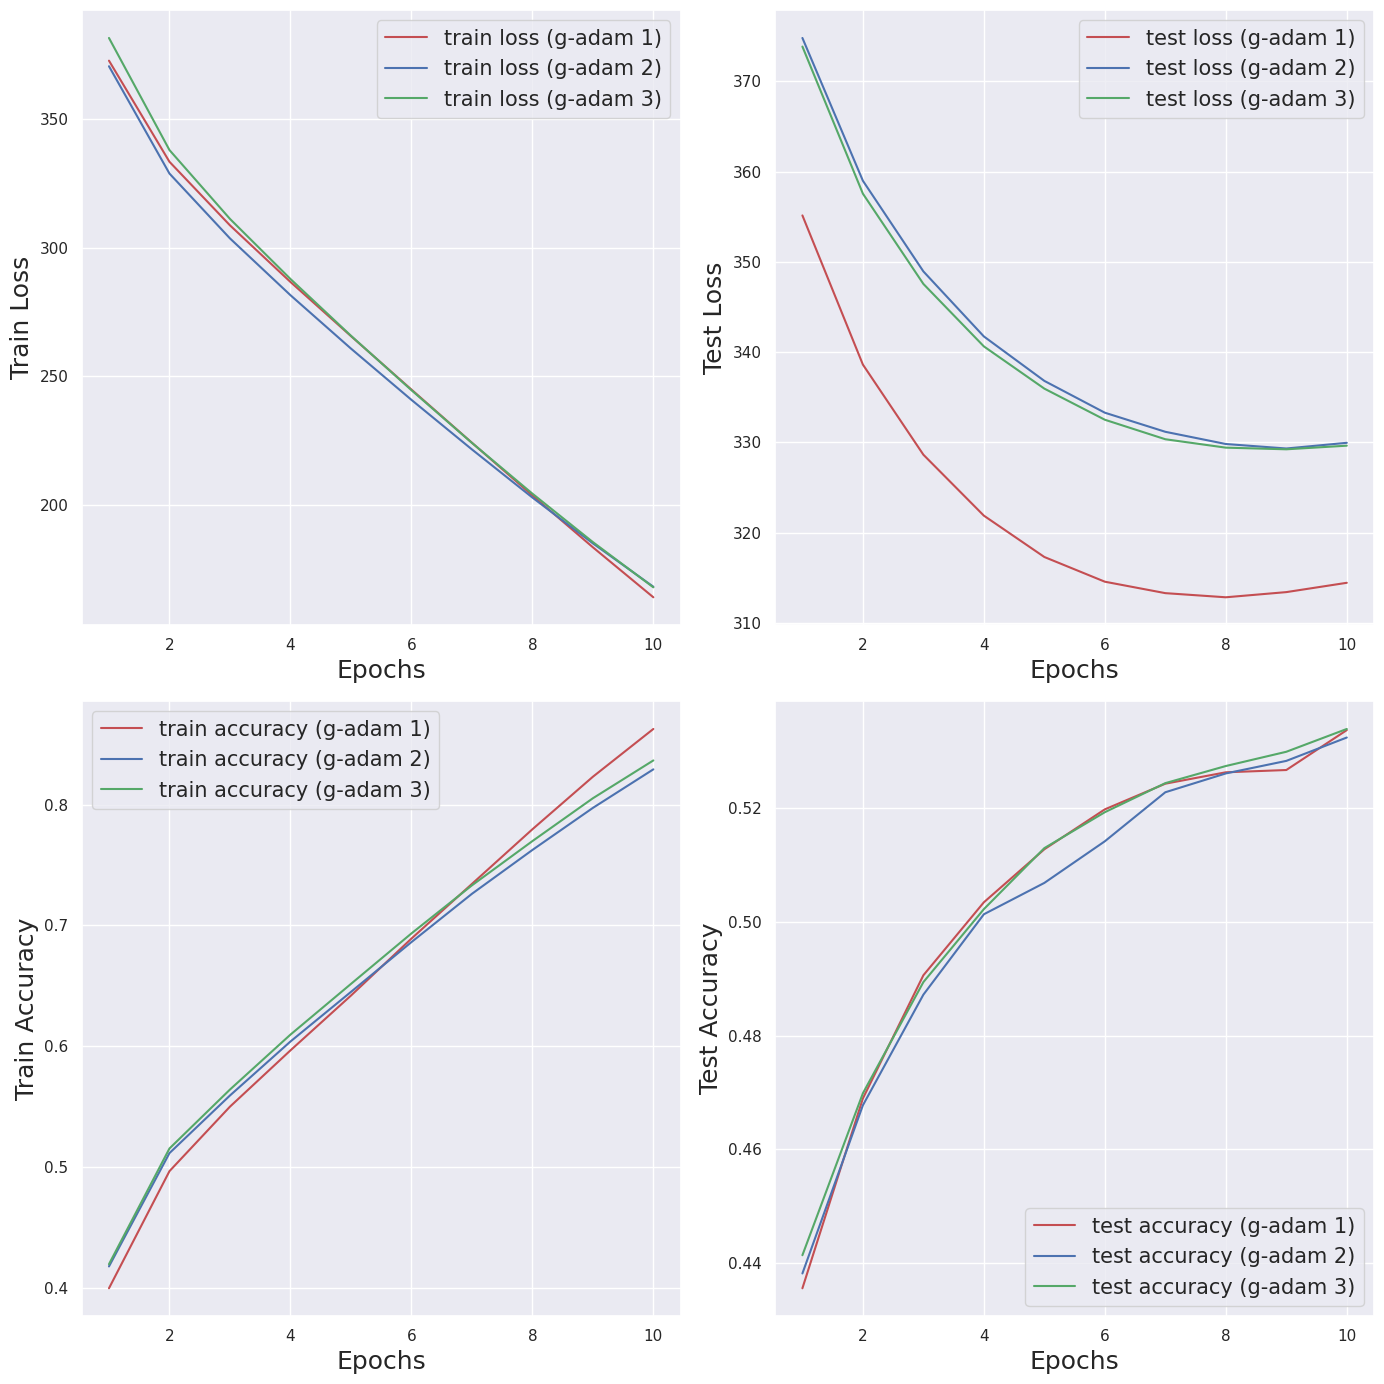

In [21]:
vis_multi_df(df_paths[8:11], opt_names[:3])

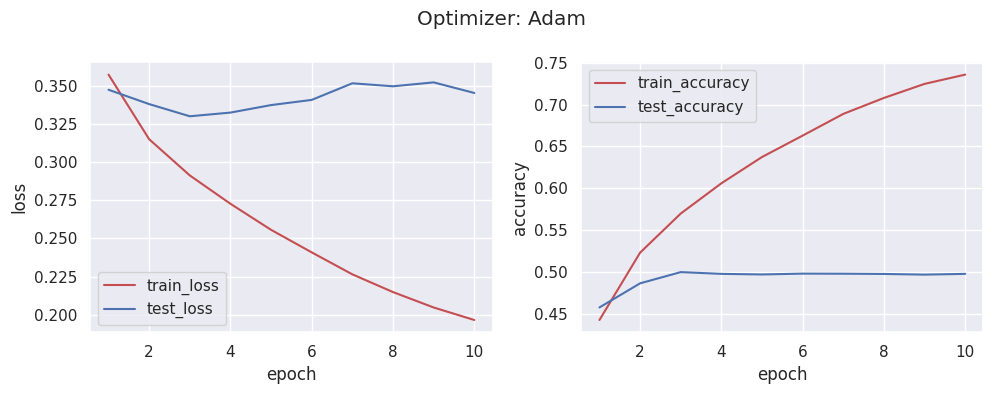

In [3]:
vis_one_df(df_paths[11], 'Adam')

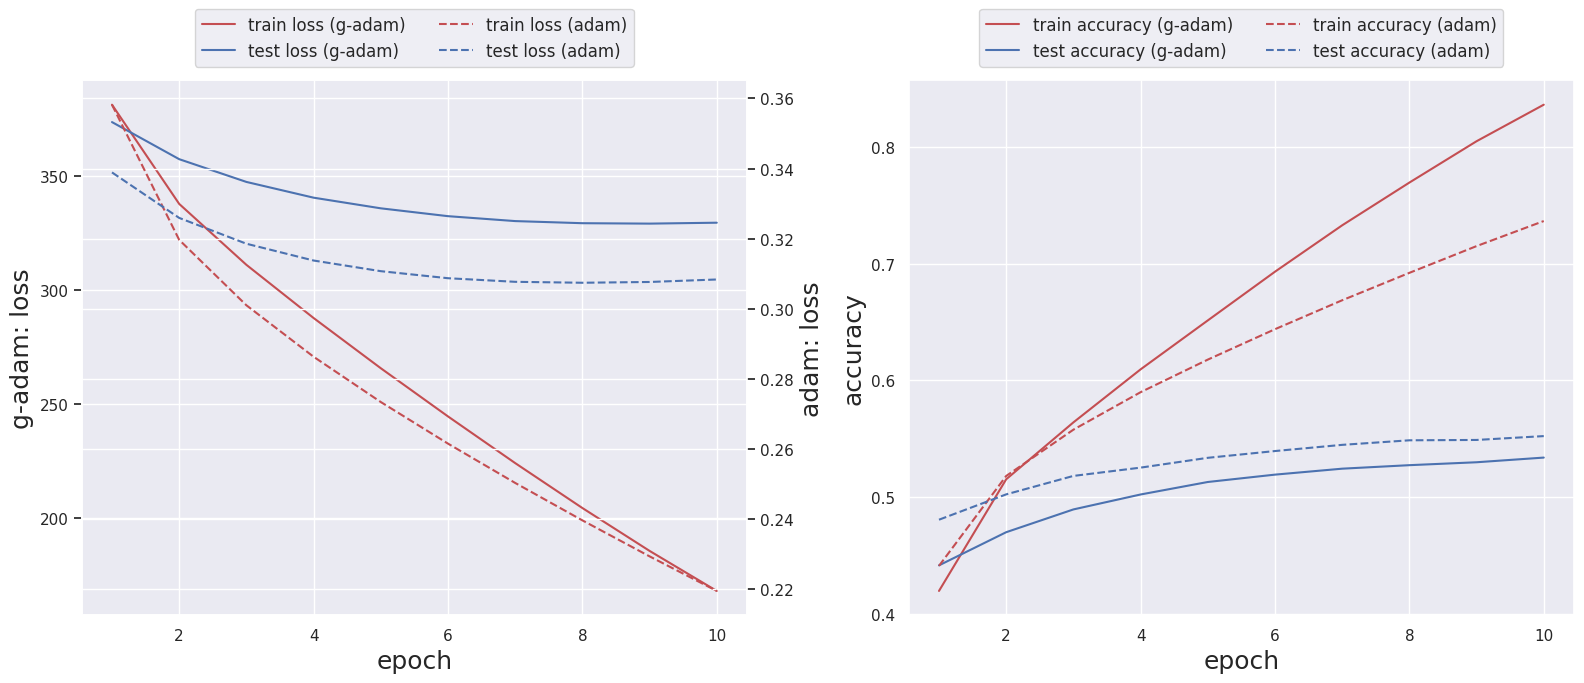

In [6]:
vis_two_df(df_paths[10], df_paths[11], 'g-adam', 'adam')

In [26]:
emp_ngd = pd.read_csv('../results/empirical_ngd.csv', index_col=0)
gen_adam = pd.read_csv('../results/generalized_adam.csv', index_col=0)
adam = pd.read_csv('../results/adam.csv', index_col=0)
adam_mb = pd.read_csv('../results/adam_mb_64.csv', index_col=0)
gen_adam_mb = pd.read_csv('../results/generalized_adam_mb_64.csv', index_col=0)
gen_adam_mb_epoch = pd.read_csv('../results/generalized_adam_mb_64_one_ntk_one_epoch.csv', index_col=0)
gen_adam_mb_epochs = pd.read_csv('../results/generalized_adam_mb_64_one_ntk_all_epoch.csv', index_col=0)

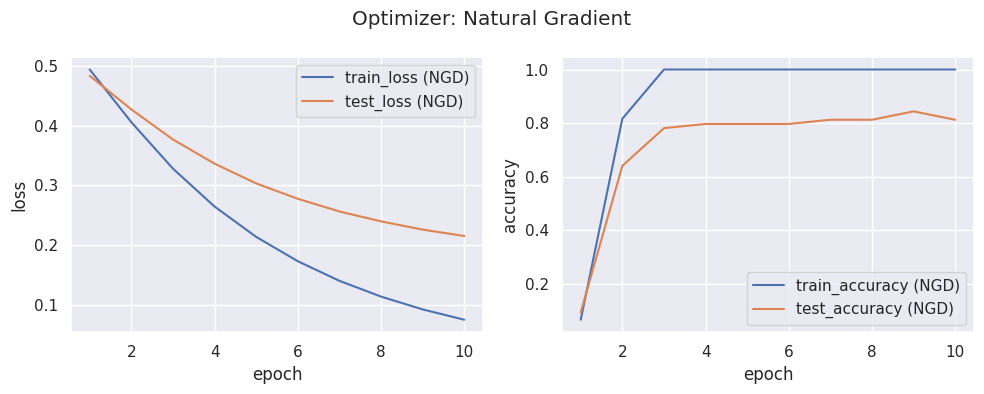

In [3]:
loss_list = ['epoch', 'train_loss (NGD)', 'test_loss (NGD)']
acc_list = ['epoch', 'train_accuracy (NGD)', 'test_accuracy (NGD)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
emp_ngd[loss_list].plot(x='epoch', ax=axes[0])
emp_ngd[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Natural Gradient')
fig.tight_layout()
fig.show()

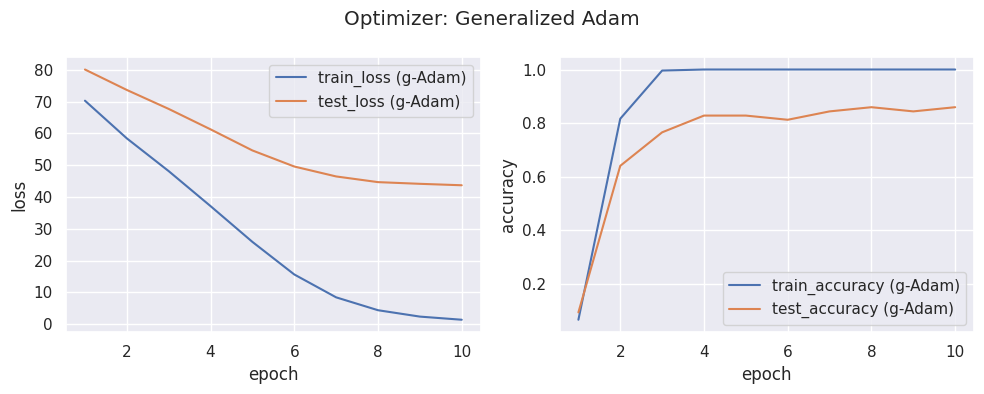

In [4]:
loss_list = ['epoch', 'train_loss (g-Adam)', 'test_loss (g-Adam)']
acc_list = ['epoch', 'train_accuracy (g-Adam)', 'test_accuracy (g-Adam)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gen_adam[loss_list].plot(x='epoch', ax=axes[0])
gen_adam[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Generalized Adam')
fig.tight_layout()
fig.show()

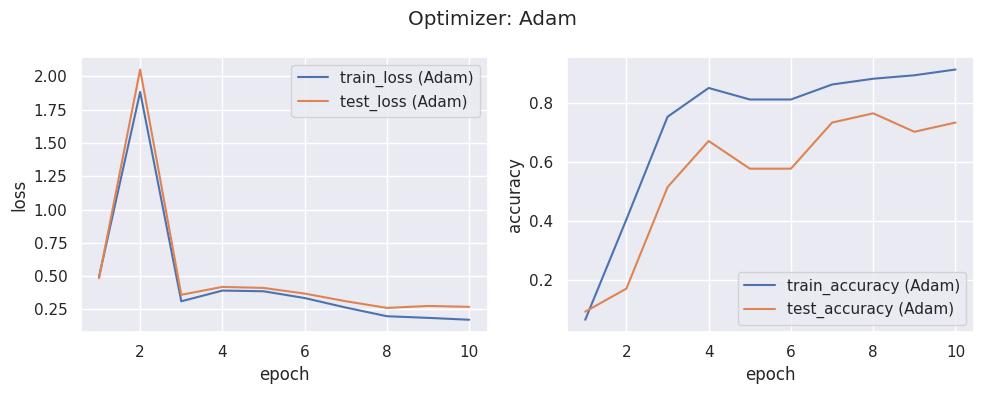

In [5]:
loss_list = ['epoch', 'train_loss (Adam)', 'test_loss (Adam)']
acc_list = ['epoch', 'train_accuracy (Adam)', 'test_accuracy (Adam)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
adam[loss_list].plot(x='epoch', ax=axes[0])
adam[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Adam')
fig.tight_layout()
fig.show()

In [6]:
ngd_trloss, ngd_teloss = emp_ngd['train_loss (NGD)'], emp_ngd['test_loss (NGD)']
ngd_trloss_decay = [ngd_trloss[i]/ngd_trloss[0] for i in range(len(ngd_trloss))]
ngd_teloss_decay = [ngd_teloss[i]/ngd_teloss[0] for i in range(len(ngd_teloss))]
emp_ngd['train_loss_decay (NGD)'] = ngd_trloss_decay
emp_ngd['test_loss_decay (NGD)'] = ngd_teloss_decay

In [7]:
gadam_trloss, gadam_teloss = gen_adam['train_loss (g-Adam)'], gen_adam['test_loss (g-Adam)']
gadam_trloss_decay = [gadam_trloss[i]/gadam_trloss[0] for i in range(len(gadam_trloss))]
gadam_teloss_decay = [gadam_teloss[i]/gadam_teloss[0] for i in range(len(gadam_teloss))]
gen_adam['train_loss_decay (g-Adam)'] = gadam_trloss_decay
gen_adam['test_loss_decay (g-Adam)'] = gadam_teloss_decay

In [8]:
adam_trloss, adam_teloss = adam['train_loss (Adam)'], adam['test_loss (Adam)']
adam_trloss_decay = [adam_trloss[i]/adam_trloss[0] for i in range(len(adam_trloss))]
adam_teloss_decay = [adam_teloss[i]/adam_teloss[0] for i in range(len(adam_teloss))]
adam['train_loss_decay (Adam)'] = adam_trloss_decay
adam['test_loss_decay (Adam)'] = adam_teloss_decay

In [9]:
merge_list = [emp_ngd, gen_adam.drop('epoch', axis=1), adam.drop('epoch', axis=1)]
merged_df = pd.concat(merge_list, axis=1)

In [10]:
merged_df

,epoch,train_accuracy (NGD),train_loss (NGD),test_accuracy (NGD),test_loss (NGD),train_loss_decay (NGD),test_loss_decay (NGD),train_accuracy (g-Adam),train_loss (g-Adam),test_accuracy (g-Adam),test_loss (g-Adam),train_loss_decay (g-Adam),test_loss_decay (g-Adam),train_accuracy (Adam),train_loss (Adam),test_accuracy (Adam),test_loss (Adam),train_loss_decay (Adam),test_loss_decay (Adam)
0,1,0.066406,0.494328,0.093750,0.483782,1.000000,1.000000,0.066406,70.273758,0.093750,80.073105,1.000000,1.000000,0.066406,0.494328,0.093750,0.483782,1.000000,1.000000
1,2,0.816406,0.406021,0.640625,0.427458,0.821358,0.883576,0.816406,58.426876,0.640625,73.644424,0.831418,0.919715,0.406250,1.882524,0.171875,2.050992,3.808248,4.239498
2,3,1.000000,0.328200,0.781250,0.377073,0.663931,0.779427,0.996094,48.132511,0.765625,67.685410,0.684929,0.845295,0.753906,0.311195,0.515625,0.359811,0.629532,0.743747
3,4,1.000000,0.264682,0.796875,0.336575,0.535438,0.695717,1.000000,37.130207,0.828125,61.261307,0.528365,0.765067,0.851562,0.391576,0.671875,0.419226,0.792137,0.866561
4,5,1.000000,0.213851,0.796875,0.303462,0.432610,0.627271,1.000000,25.884281,0.828125,54.628395,0.368335,0.682232,0.812500,0.386391,0.578125,0.411488,0.781649,0.850566
5,6,1.000000,0.173077,0.796875,0.277728,0.350126,0.574077,1.000000,15.645565,0.812500,49.579559,0.222637,0.619179,0.812500,0.335592,0.578125,0.369025,0.678885,0.762791
6,7,1.000000,0.140212,0.812500,0.256458,0.283640,0.530111,1.000000,8.453731,0.843750,46.458256,0.120297,0.580198,0.863281,0.264122,0.734375,0.311549,0.534305,0.643986
7,8,1.000000,0.113793,0.812500,0.239869,0.230197,0.495821,1.000000,4.407449,0.859375,44.671455,0.062718,0.557883,0.882812,0.199074,0.765625,0.261651,0.402717,0.540846
8,9,1.000000,0.092344,0.843750,0.226042,0.186807,0.467240,1.000000,2.400681,0.843750,44.140823,0.034162,0.551257,0.894531,0.186765,0.703125,0.276071,0.377816,0.570653
9,10,1.000000,0.075028,0.812500,0.215354,0.151777,0.445148,1.000000,1.413945,0.859375,43.686291,0.020121,0.545580,0.914062,0.172720,0.734375,0.269621,0.349403,0.557320


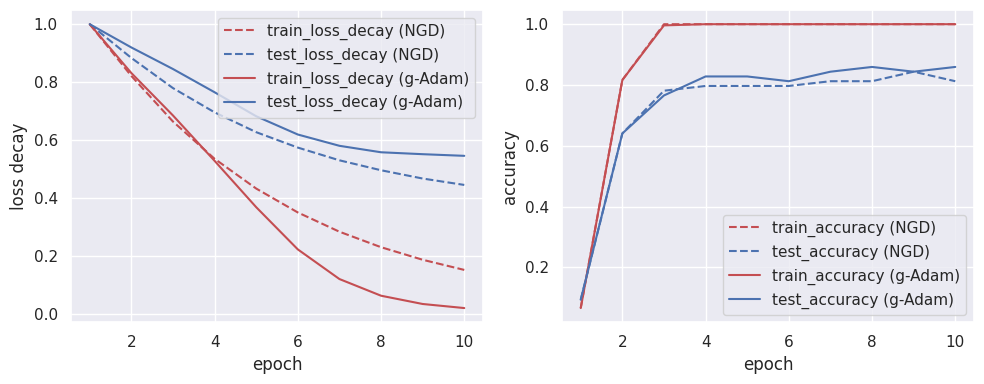

In [10]:
decay_list = [
    'epoch', 'train_loss_decay (NGD)', 'test_loss_decay (NGD)',
    'train_loss_decay (g-Adam)', 'test_loss_decay (g-Adam)'
    ]

acc_list = [
    'epoch', 'train_accuracy (NGD)', 'test_accuracy (NGD)',
    'train_accuracy (g-Adam)', 'test_accuracy (g-Adam)'
    ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
merged_df[decay_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[0])
merged_df[acc_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[1])
axes[0].set_ylabel('loss decay')
axes[1].set_ylabel('accuracy')
fig.tight_layout()
fig.show()

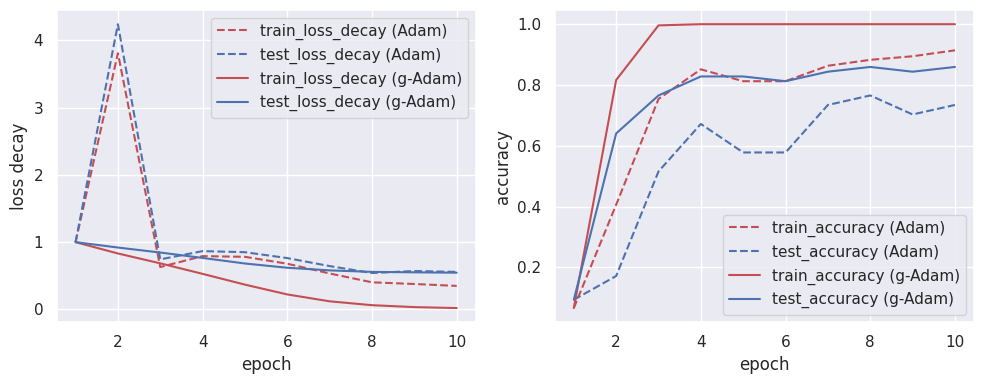

In [11]:
decay_list = [
    'epoch', 'train_loss_decay (Adam)', 'test_loss_decay (Adam)',
    'train_loss_decay (g-Adam)', 'test_loss_decay (g-Adam)'
    ]

acc_list = [
    'epoch', 'train_accuracy (Adam)', 'test_accuracy (Adam)',
    'train_accuracy (g-Adam)', 'test_accuracy (g-Adam)'
    ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
merged_df[decay_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[0])
merged_df[acc_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[1])
axes[0].set_ylabel('loss decay')
axes[1].set_ylabel('accuracy')
fig.tight_layout()
fig.show()

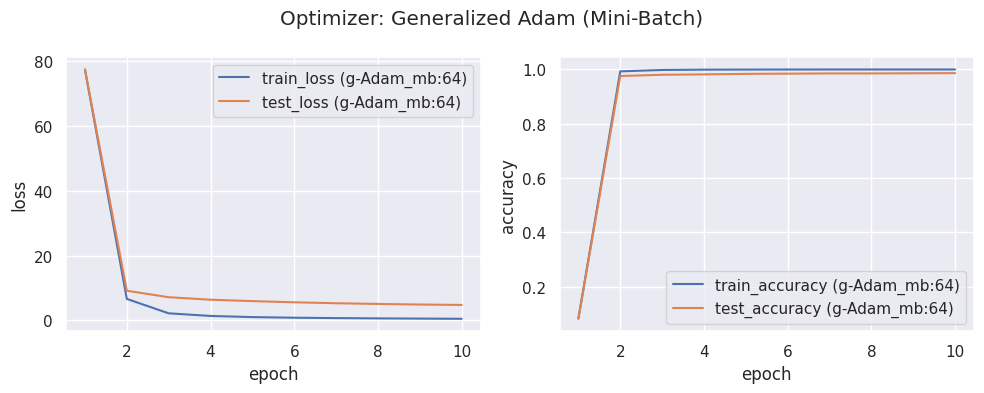

In [16]:
loss_list = ['epoch', 'train_loss (g-Adam_mb:64)', 'test_loss (g-Adam_mb:64)']
acc_list = ['epoch', 'train_accuracy (g-Adam_mb:64)', 'test_accuracy (g-Adam_mb:64)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gen_adam_mb[loss_list].plot(x='epoch', ax=axes[0])
gen_adam_mb[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Generalized Adam (Mini-Batch)')
fig.tight_layout()
fig.show()

In [6]:
merge_list = [gen_adam, gen_adam_mb.drop('epoch', axis=1)]
merged_df = pd.concat(merge_list, axis=1)

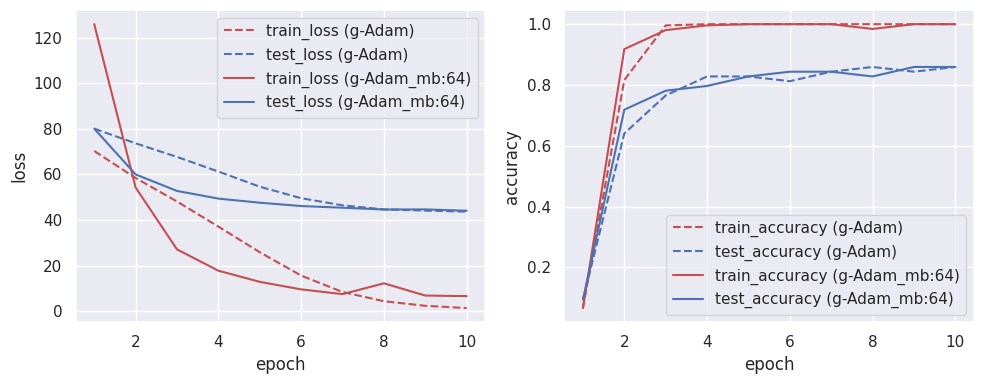

In [7]:
loss_list = [
    'epoch', 'train_loss (g-Adam)', 'test_loss (g-Adam)',
    'train_loss (g-Adam_mb:64)', 'test_loss (g-Adam_mb:64)'
    ]

acc_list = [
    'epoch', 'train_accuracy (g-Adam)', 'test_accuracy (g-Adam)',
    'train_accuracy (g-Adam_mb:64)', 'test_accuracy (g-Adam_mb:64)'
    ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
merged_df[loss_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[0])
merged_df[acc_list].plot(x='epoch', style=['r--', 'b--', 'r', 'b'], ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.tight_layout()
fig.show()

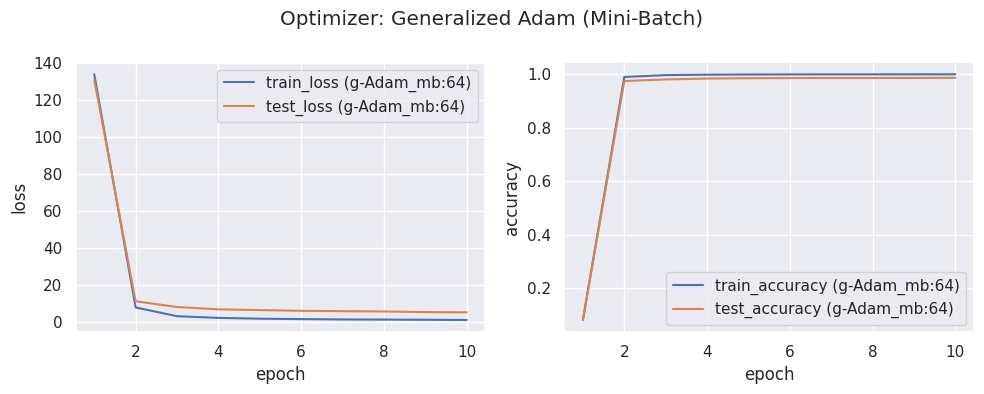

In [23]:
loss_list = ['epoch', 'train_loss (g-Adam_mb:64)', 'test_loss (g-Adam_mb:64)']
acc_list = ['epoch', 'train_accuracy (g-Adam_mb:64)', 'test_accuracy (g-Adam_mb:64)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gen_adam_mb_epochs[loss_list].plot(x='epoch', ax=axes[0])
gen_adam_mb_epochs[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Generalized Adam (Mini-Batch)')
fig.tight_layout()
fig.show()

In [20]:
gen_adam_mb_epochs

,epoch,train_accuracy (g-Adam_mb:64),train_loss (g-Adam_mb:64),test_accuracy (g-Adam_mb:64),test_loss (g-Adam_mb:64),time (g-Adam_mb:64)
0,1,0.082861,133.826390,0.081631,130.860660,53.004226
1,2,0.989795,7.839551,0.974559,11.149886,3.788035
2,3,0.996865,3.089711,0.980569,8.069700,3.420261
3,4,0.998316,2.188874,0.983874,6.806818,3.476641
4,5,0.999033,1.747216,0.985176,6.410347,3.536377
5,6,0.999433,1.519995,0.985577,6.011434,3.482677
6,7,0.999650,1.345120,0.985877,5.804972,3.374268
7,8,0.999667,1.258837,0.985877,5.655186,3.239295
8,9,0.999700,1.174512,0.986278,5.312219,3.284359
9,10,0.999783,1.061896,0.986679,5.186392,3.444638


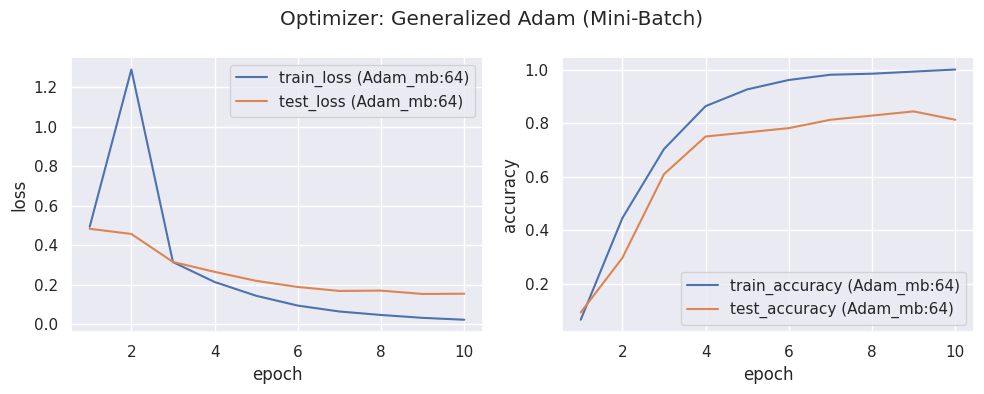

In [28]:
loss_list = ['epoch', 'train_loss (Adam_mb:64)', 'test_loss (Adam_mb:64)']
acc_list = ['epoch', 'train_accuracy (Adam_mb:64)', 'test_accuracy (Adam_mb:64)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
adam_mb[loss_list].plot(x='epoch', ax=axes[0])
adam_mb[acc_list].plot(x='epoch', ax=axes[1])
axes[0].set_ylabel('loss')
axes[1].set_ylabel('accuracy')
fig.suptitle('Optimizer: Generalized Adam (Mini-Batch)')
fig.tight_layout()
fig.show()

In [27]:
adam_mb

,epoch,train_accuracy (Adam_mb:64),train_loss (Adam_mb:64),test_accuracy (Adam_mb:64),test_loss (Adam_mb:64),time (Adam_mb:64)
0,1,0.066406,0.494328,0.093750,0.483782,1.990376
1,2,0.445312,1.290828,0.296875,0.457614,2.098679
2,3,0.703125,0.315016,0.609375,0.315769,0.041102
3,4,0.863281,0.214290,0.750000,0.265688,0.040858
4,5,0.925781,0.144325,0.765625,0.220016,0.040653
5,6,0.960938,0.094575,0.781250,0.188948,0.040769
6,7,0.980469,0.064691,0.812500,0.168867,0.040794
7,8,0.984375,0.047074,0.828125,0.170544,0.040807
8,9,0.992188,0.032518,0.843750,0.153530,0.041023
9,10,1.000000,0.022960,0.812500,0.154810,0.040551
